Importing required libraries

In [283]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing Datasets

In [284]:
m_data = pd.read_csv(r"C:\Users\piran\Downloads\Sparks Intern\Task 5\Indian Premier League\matches.csv")
balls = pd.read_csv(r"C:\Users\piran\Downloads\Sparks Intern\Task 5\Indian Premier League\deliveries.csv")

Pre-processing

In [285]:
m_data['player_of_match'] = m_data['player_of_match'].astype('str') 

In [286]:
m_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  756 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [287]:
m_data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [339]:
#m_data[m_data["team1"]=="Delhi Daredevils"].index
m_data = m_data.replace(['Delhi Daredevils'],'Delhi Capitals')
m_data = m_data.replace(['Rising Pune Supergiant'],'Rising Pune Supergiants')

Finding the player with most number of MOM awards

In [340]:
mom = m_data.groupby("player_of_match").count().sort_values("id",ascending=False)
mom.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,venue,umpire1,umpire2,umpire3
player_of_match,,,,,,,,,,,,,,,,,
CH Gayle,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,3
AB de Villiers,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,5
DA Warner,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,2
RG Sharma,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,3
MS Dhoni,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,4
YK Pathan,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,0
SR Watson,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,5
SK Raina,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,0
G Gambhir,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,0


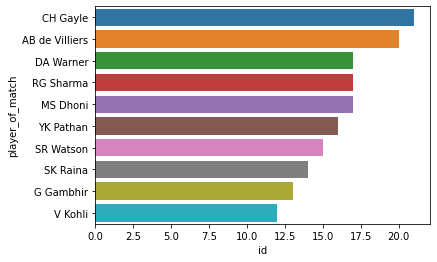

In [341]:
moms = sns.barplot(data = mom.head(10),x="id",y=mom.head(10).index)

Finding the team with most number of wins

In [342]:
win = m_data.groupby("winner")
winners = win.count().sort_values("id",ascending=False)
winners

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
winner,,,,,,,,,,,,,,,,,
Mumbai Indians,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,17
Chennai Super Kings,100,100,98,100,100,100,100,100,100,100,100,100,100,100,100,100,21
Kolkata Knight Riders,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,15
Royal Challengers Bangalore,84,84,83,84,84,84,84,84,84,84,84,84,84,84,83,83,11
Kings XI Punjab,82,82,81,82,82,82,82,82,82,82,82,82,82,82,82,82,12
Delhi Capitals,77,77,76,77,77,77,77,77,77,77,77,77,77,77,76,76,14
Rajasthan Royals,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,12
Sunrisers Hyderabad,58,58,56,58,58,58,58,58,58,58,58,58,58,58,58,58,16
Deccan Chargers,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,0


[Text(0.5, 0, 'Matches Won'), Text(0, 0.5, 'Teams')]

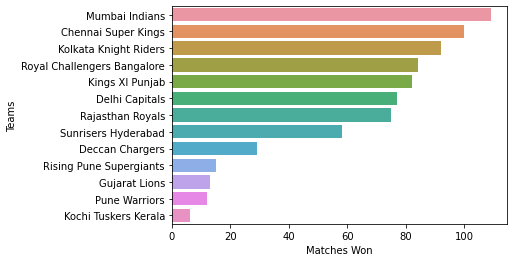

In [343]:
pl = sns.barplot(data = winners, x ="id",y=winners.index)
pl.set(xlabel = "Matches Won", ylabel = "Teams")

Finding the highest wicket taker

In [344]:
balls

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [345]:
#Retrieving the wicket-taking deliveries
wickets=balls[pd.notnull(balls)["dismissal_kind"]]
#Dropping the run outs as it doesn't count towards bowler stats
wickets.drop(wickets[wickets["dismissal_kind"] == "run out"].index)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
11,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,5,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh
64,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,11,3,S Dhawan,MC Henriques,STR Binny,0,...,0,0,0,0,0,0,0,S Dhawan,caught,Sachin Baby
94,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby
116,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,19,4,Yuvraj Singh,DJ Hooda,TS Mills,0,...,0,0,0,0,0,0,0,Yuvraj Singh,bowled,NaN
160,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,6,4,Mandeep Singh,CH Gayle,Rashid Khan,0,...,0,0,0,0,0,0,0,Mandeep Singh,bowled,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178977,11415,2,Chennai Super Kings,Mumbai Indians,4,6,F du Plessis,SR Watson,KH Pandya,0,...,0,0,0,0,0,0,0,F du Plessis,stumped,Q de Kock
179012,11415,2,Chennai Super Kings,Mumbai Indians,10,2,SK Raina,SR Watson,RD Chahar,0,...,0,0,0,0,0,0,0,SK Raina,lbw,NaN
179019,11415,2,Chennai Super Kings,Mumbai Indians,11,3,AT Rayudu,SR Watson,JJ Bumrah,0,...,0,0,0,0,0,0,0,AT Rayudu,caught,Q de Kock
179067,11415,2,Chennai Super Kings,Mumbai Indians,19,2,DJ Bravo,SR Watson,JJ Bumrah,0,...,0,0,0,0,0,0,0,DJ Bravo,caught,Q de Kock


In [346]:
#Getting the all-time highest wicket taker in IPL
bow_wic = wickets.groupby("bowler")
bow_wics=bow_wic.count().sort_values("match_id",ascending=False)
bow_wics.head(20)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
bowler,,,,,,,,,,,,,,,,,,,,
SL Malinga,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,109
DJ Bravo,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,134
A Mishra,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,123
Harbhajan Singh,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,112
PP Chawla,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,93
B Kumar,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,93
R Ashwin,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,99
SP Narine,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,78
UT Yadav,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,106


[Text(0.5, 0, 'Wickets Taken'), Text(0, 0.5, 'Bowlers')]

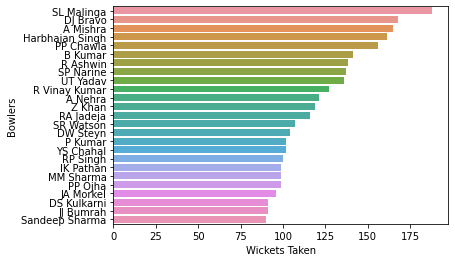

In [347]:
wi = sns.barplot(data = bow_wics.head(25), x ="match_id",y=bow_wics.head(25).index)
wi.set(xlabel = "Wickets Taken", ylabel = "Bowlers")


In [348]:
bow_wics = bow_wic.count().sort_values("match_id",ascending=False)["match_id"]
bow_wics


bowler
SL Malinga         188
DJ Bravo           168
A Mishra           165
Harbhajan Singh    161
PP Chawla          156
                  ... 
LA Carseldine        1
AA Noffke            1
AA Kazi              1
Swapnil Singh        1
LMP Simmons          1
Name: match_id, Length: 352, dtype: int64

Finding the most economical bowler(minimum 300 balls bowled)

In [349]:
bow_runs = deli.groupby("bowler")["total_runs"].sum().sort_values(ascending = False)
bow_balls = deli.groupby("bowler").count()
bow_balls = bow_balls["match_id"]
bow_balls = bow_balls.rename("deliveries")

In [350]:
bowl = pd.merge(bow_runs,bow_balls,left_on="bowler",right_on="bowler")
bowl = pd.merge(bowl,bow_wics,left_on="bowler",right_on="bowler")
bowl = bowl.rename(columns={"match_id":"wickets"})
bowl["economy"] = (bowl["total_runs"]/bowl["deliveries"])*6
bowl = bowl.drop(bowl[bowl["deliveries"]<300].index)

In [351]:
bowl = bowl.sort_values(by="economy")
bowl

,total_runs,deliveries,wickets,economy
bowler,,,,
A Kumble,1089,983,49,6.646999
DW Steyn,2454,2207,104,6.671500
GD McGrath,366,329,14,6.674772
M Muralitharan,1765,1581,67,6.698292
R Ashwin,3391,3016,138,6.746021
...,...,...,...,...
Mohammed Siraj,900,584,30,9.246575
MP Stoinis,588,378,16,9.333333
P Krishna,685,437,16,9.405034


<AxesSubplot:xlabel='economy', ylabel='bowler'>

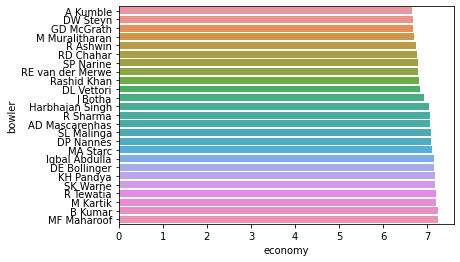

In [352]:
sns.barplot(data = bowl.head(25), x='economy', y=bowl.head(25).index)

Factors Affecting Win/Loss

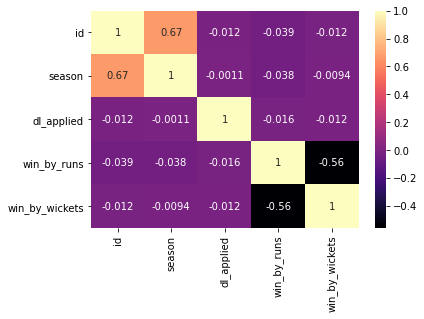

In [353]:
correl = sns.heatmap(m_data.corr(), annot=True, cmap='magma')

In [354]:
#dl_applied and season have zero correlation to win or loss, thus they can be dropped as they aren't factors contributing to win/loss
m_data.drop(["dl_applied","season"],axis=1)

,id,city,date,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [379]:
#List of matches in which the team won after winning the toss
toss_win = m_data[m_data["winner"] == m_data["toss_winner"]]
win_toss = toss_win.groupby(["toss_decision","toss_winner"]).count()
win_toss = win_toss["id"]
tot_win_toss = win_toss['bat'].add(win_toss['field'],fill_value=0)
win_perc_bat = win_toss['bat'].divide(tot_win_toss,fill_value=1)
win_perc_bat

toss_winner
Chennai Super Kings            0.526316
Deccan Chargers                0.578947
Delhi Capitals                 0.285714
Gujarat Lions                  0.100000
Kings XI Punjab                0.171429
Kochi Tuskers Kerala           0.250000
Kolkata Knight Riders          0.283019
Mumbai Indians                 0.446429
Pune Warriors                  1.000000
Rajasthan Royals               0.357143
Rising Pune Supergiants        0.125000
Royal Challengers Bangalore    0.219512
Sunrisers Hyderabad            0.347826
Name: id, dtype: float64

<AxesSubplot:xlabel='toss_winner'>

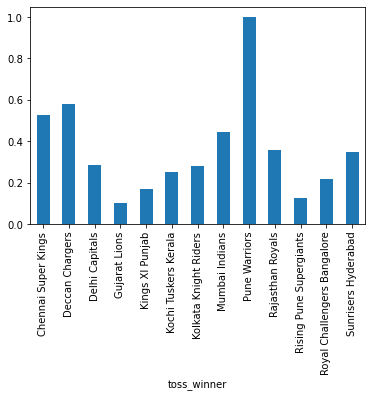

In [380]:
win_perc_bat.plot.bar(x='id',y='toss_winner')

It is easy to see that toss decisions matter a lot for some teams. Teams like KKR, Punjab have a very high chance of losing if they win the toss and chose to bat. Teams like GL,PW,RPS and KT are outliers as they played very less. The above series show the chance of winning of teams if they chose to bat after they win the toss. 

In [306]:
deli = pd.merge(balls,m_data,left_on='match_id', right_on='id')
deli.size


6984042

In [307]:
deli.shape

(179078, 39)

Stadiums and number of matches played in them

<AxesSubplot:>

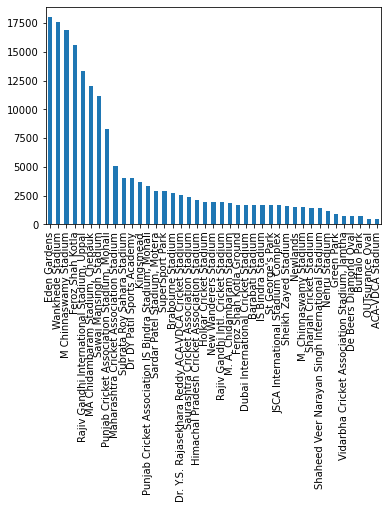

In [308]:
deli["venue"].value_counts().sort_values(ascending = False).plot.bar(x="matches",y="stadium")

Finding out the best batsmen of IPL

In [309]:
balls_faced = deli.groupby("batsman").count().sort_values(by="id",ascending = False)
balls_faced = balls_faced["match_id"]
balls_faced

batsman
V Kohli        4211
SK Raina       4044
RG Sharma      3816
S Dhawan       3776
G Gambhir      3524
               ... 
P Raj             1
Sunny Gupta       1
LH Ferguson       1
C Nanda           1
S Kaushik         1
Name: match_id, Length: 516, dtype: int64

In [320]:
runs_scored = deli.groupby("batsman")["batsman_runs"].sum().sort_values(ascending=False)
runs_scored

batsman
V Kohli         5434
SK Raina        5415
RG Sharma       4914
DA Warner       4741
S Dhawan        4632
                ... 
J Denly            0
C Nanda            0
RR Bhatkal         0
K Ahmed            0
Abdur Razzak       0
Name: batsman_runs, Length: 516, dtype: int64

In [321]:
batsmen = pd.merge(balls_faced,runs_scored,left_on="batsman",right_on="batsman")
batsmen['balls_faced'] =batsmen["match_id"]
batsmen = batsmen.drop("match_id",axis=1)

In [323]:
batsmen["strike_rate"] = (batsmen["batsman_runs"]/batsmen["balls_faced"])*100
batsmen

,batsman_runs,balls_faced,strike_rate
batsman,,,
V Kohli,5434,4211,129.042983
SK Raina,5415,4044,133.902077
RG Sharma,4914,3816,128.773585
S Dhawan,4632,3776,122.669492
G Gambhir,4223,3524,119.835414
...,...,...,...
P Raj,0,1,0.000000
Sunny Gupta,0,1,0.000000
LH Ferguson,1,1,100.000000


In [324]:
best_batsmen = batsmen.sort_values(['batsman_runs','strike_rate'], ascending=False)[:20]
best_batsmen

,batsman_runs,balls_faced,strike_rate
batsman,,,
V Kohli,5434,4211,129.042983
SK Raina,5415,4044,133.902077
RG Sharma,4914,3816,128.773585
DA Warner,4741,3398,139.523249
S Dhawan,4632,3776,122.669492
CH Gayle,4560,3131,145.640370
MS Dhoni,4477,3318,134.930681
RV Uthappa,4446,3492,127.319588
AB de Villiers,4428,2977,148.740343


<AxesSubplot:xlabel='batsman_runs', ylabel='batsman'>

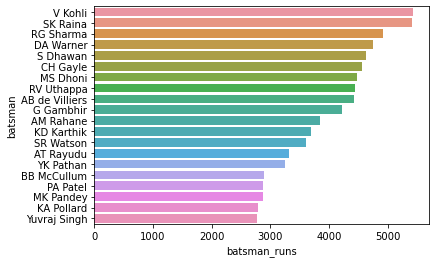

In [326]:
sns.barplot(data=best_batsmen,x="batsman_runs",y=best_batsmen.index)

<AxesSubplot:xlabel='strike_rate', ylabel='batsman'>

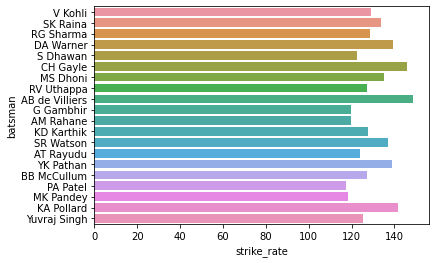

In [327]:
sns.barplot(data=best_batsmen,x="strike_rate",y=best_batsmen.index)